In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
MovieNums = pd.read_csv('Budget_clean.csv', index_col = [0])

In [3]:
#adding Return on Investment column to normalize data
MovieNums['%ROI'] = MovieNums['Dom_Profits'] / MovieNums['Budget'] 

In [4]:
#Make a sub df of Week and ROI
MovieNumsWKROI = MovieNums[['Week', '%ROI']]
#Grouped by Week and Calculated the ROI
MovieNumsROI_Med = MovieNumsWKROI.groupby('Week').median()
#Sorted the df by Median ROIs
MovieNumsROI_Med.sort_values('%ROI', inplace = True)
#saved the sorted weeks as a list to feed into plot order
WeeksByROI = MovieNumsROI_Med.index.tolist()
#optional to limit limit list to top 25 ROI medians
TrunkWeeksByROI = WeeksByROI[-10::]
TrunkWeeks = sorted(TrunkWeeksByROI)


In [5]:
TrunkWeeksByROI.reverse()

In [6]:
TrunkWeeksByROI

[27, 22, 20, 31, 6, 30, 40, 26, 7, 28]

In [7]:
TrunkWeeks

[6, 7, 20, 22, 26, 27, 28, 30, 31, 40]

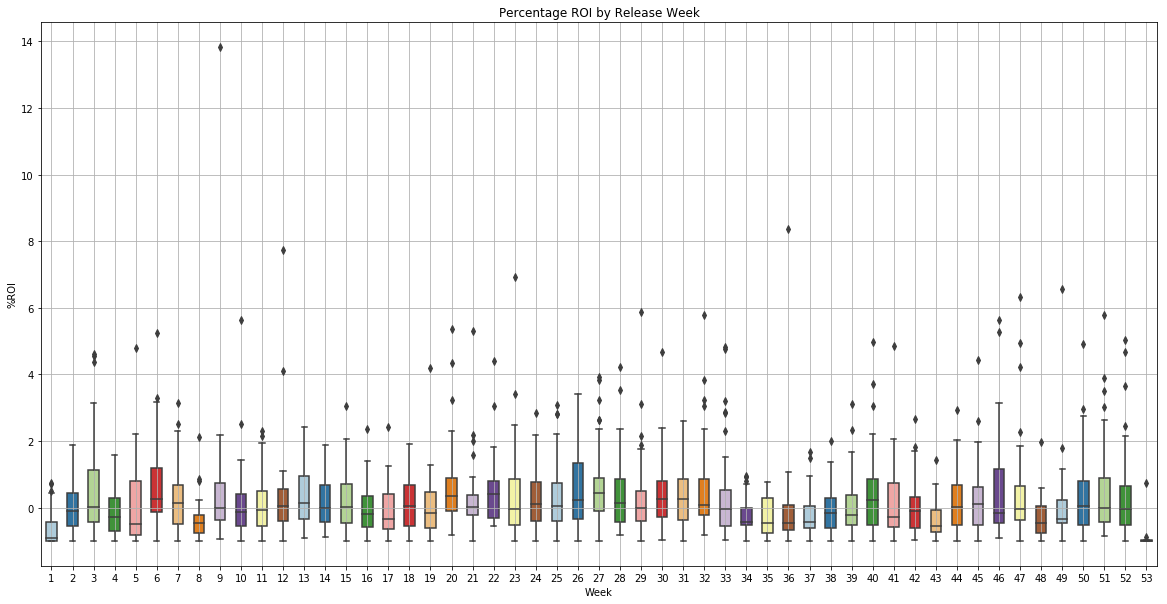

In [8]:
#plot %ROI by weeks
fig= plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired")
plt.grid()
plt.title("Percentage ROI by Release Week");


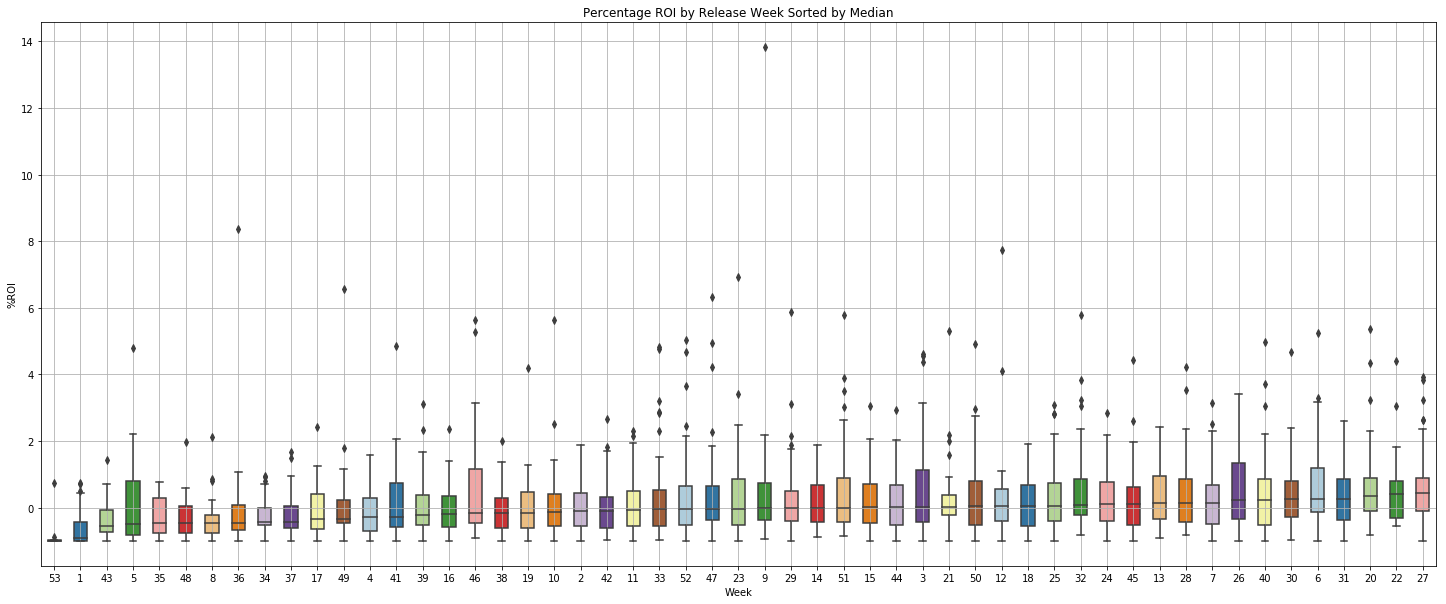

In [9]:
#plot %ROI by weeks sorted by median values
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = WeeksByROI )
plt.grid()
plt.title("Percentage ROI by Release Week Sorted by Median" );

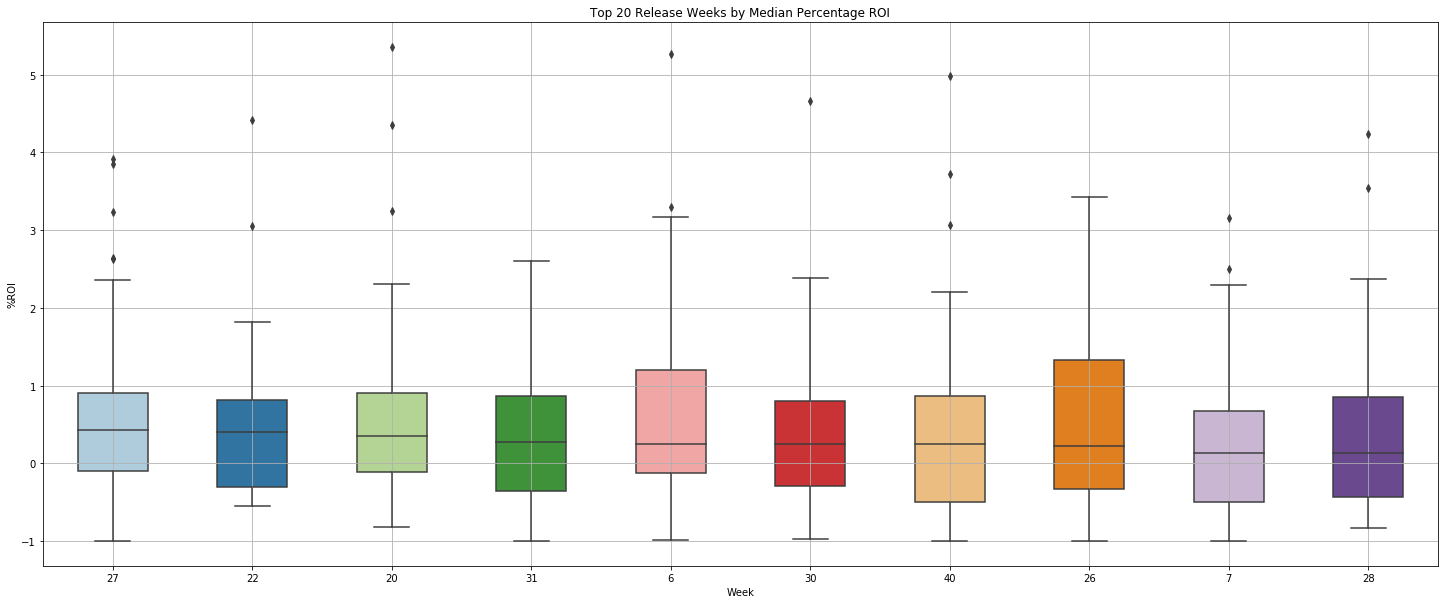

In [10]:
#plot top 20 median ROI values sorted by Median ROI
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeksByROI )
plt.grid()
plt.title("Top 20 Release Weeks by Median Percentage ROI");

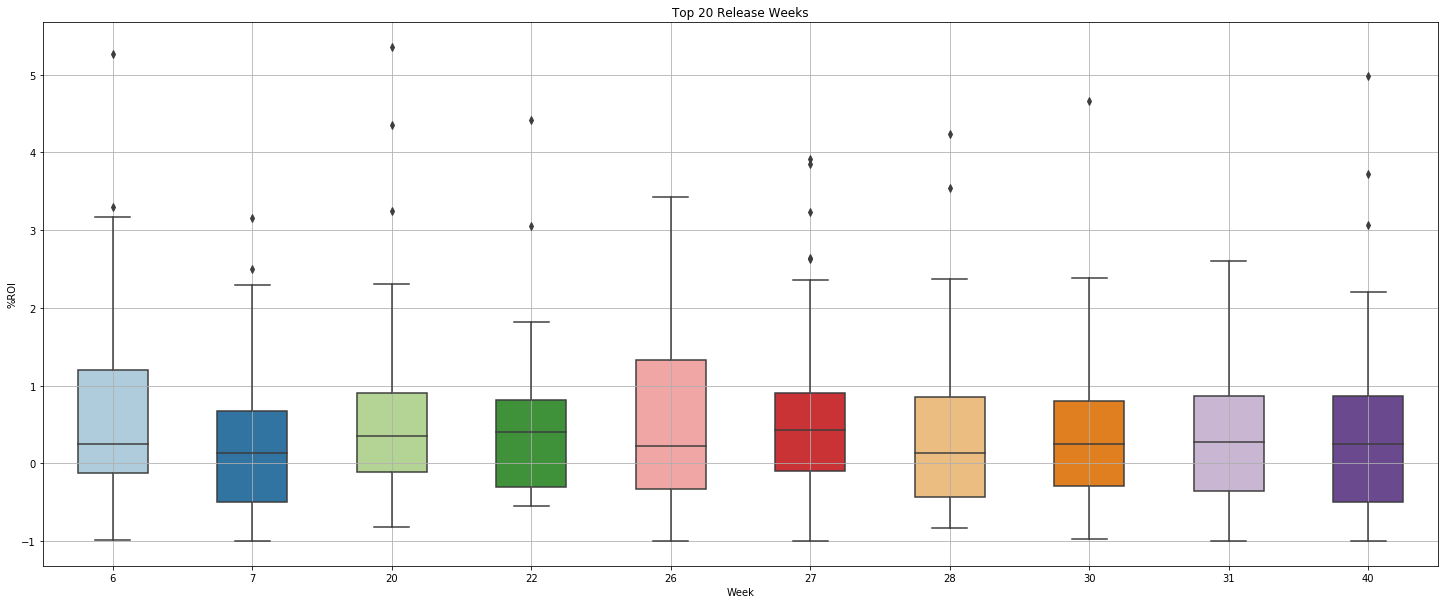

In [11]:
#plot top 20 median ROI values sorted by week
fig= plt.figure(figsize=(25,10))
bplot = sns.boxplot(y='%ROI', x='Week', 
                 data=MovieNums, 
                 width=0.5,
                 palette="Paired", order = TrunkWeeks )
plt.grid()
plt.title("Top 20 Release Weeks");

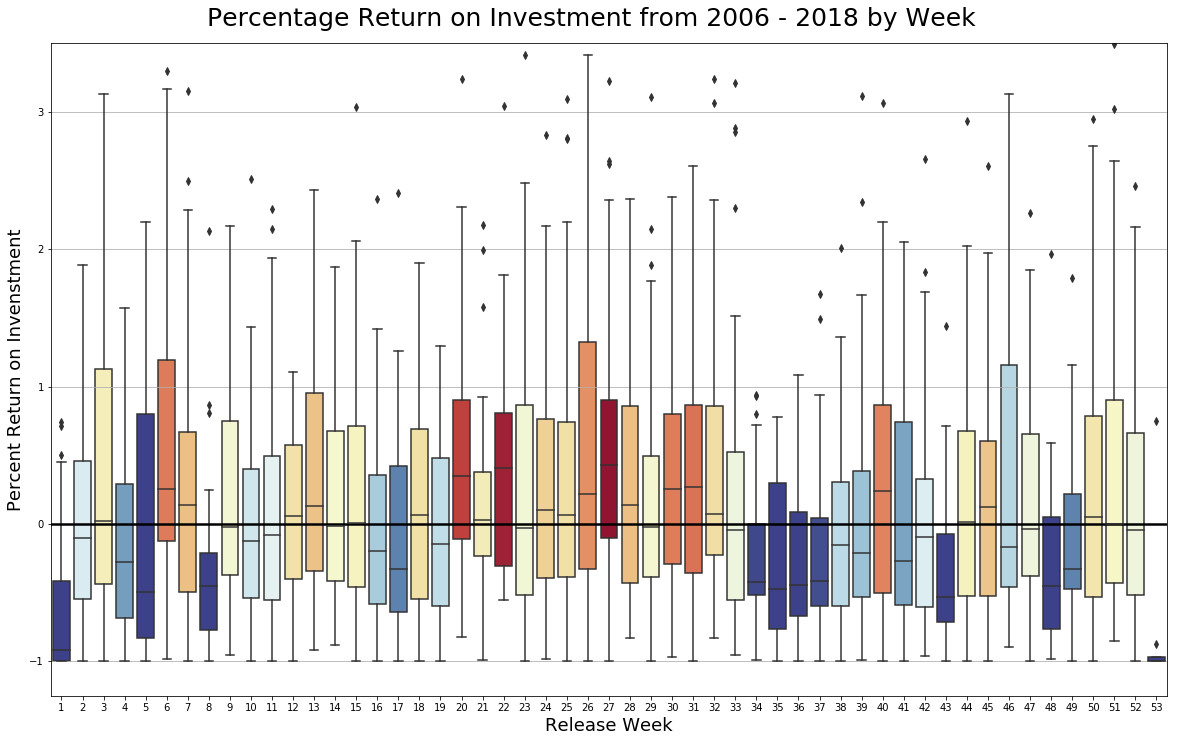

In [23]:
# #plot %ROI by weeks
# fig= plt.figure(figsize=(20,10))
# bplot = sns.boxplot(y='%ROI', x='Week', 
#                  data=MovieNums, 
#                  width=0.5,
#                  palette="Paired")
# plt.grid()
# plt.title("Percentage ROI by Release Week");

median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(0-median_vals.max(), median_vals.max()-0)
median_vals = median_vals.tolist()
colors = plt.cm.RdYlBu_r(norm(median_vals))

plt.figure(figsize=(20,12))
plt.rcParams["axes.labelsize"] = 18
plt.ylim(-1.25, 3.5)
plt.grid(b=True, which='major', axis='both')
ax = sns.boxplot(x="Week", y="%ROI", data=MovieNums, palette=colors, showfliers=True).set(xlabel='Release Week', ylabel='Percent Return on Invenstment')
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
plt.figtext(.5,.9,'Percentage Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
plt.savefig('ROI_by_Week.jpg')
plt.show()




In [13]:
plt.savefig('ROI_by_Week.jpeg')

<Figure size 432x288 with 0 Axes>

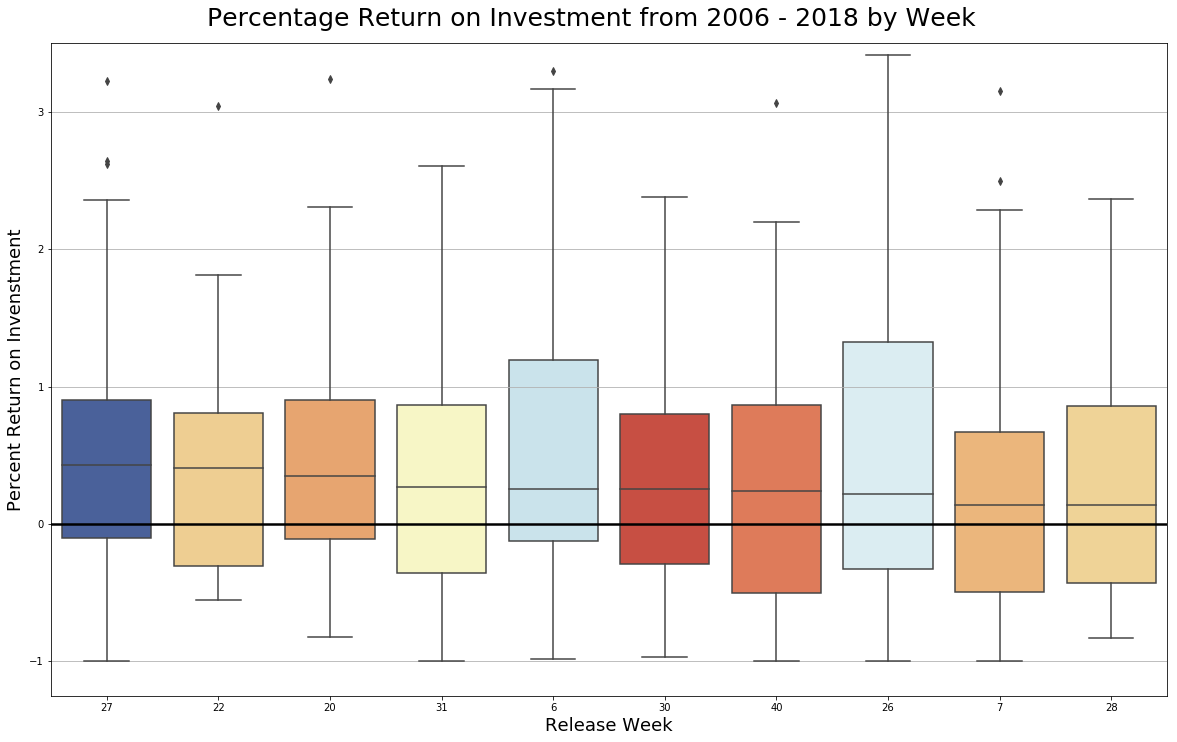

In [14]:
median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.RdYlBu_r(norm(median_vals))

plt.figure(figsize=(20,12))
plt.rcParams["axes.labelsize"] = 18
plt.ylim(-1.25, 3.5)
plt.grid(b=True, which='major', axis='both')
ax = sns.boxplot(x="Week", y="%ROI", data=MovieNums, palette=colors, order = TrunkWeeksByROI).set(xlabel='Release Week', ylabel='Percent Return on Invenstment')
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
plt.figtext(.5,.9,'Percentage Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
plt.show()

# fig= plt.figure(figsize=(25,10))
# bplot = sns.boxplot(y='%ROI', x='Week', 
#                  data=MovieNums, 
#                  width=0.5,
#                  palette="Paired", order = TrunkWeeks )
# plt.grid()
# plt.title("Top 20 Release Weeks");

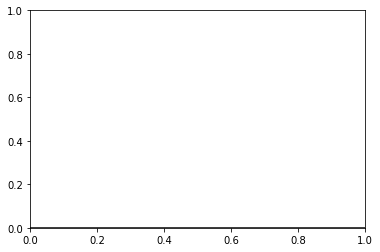

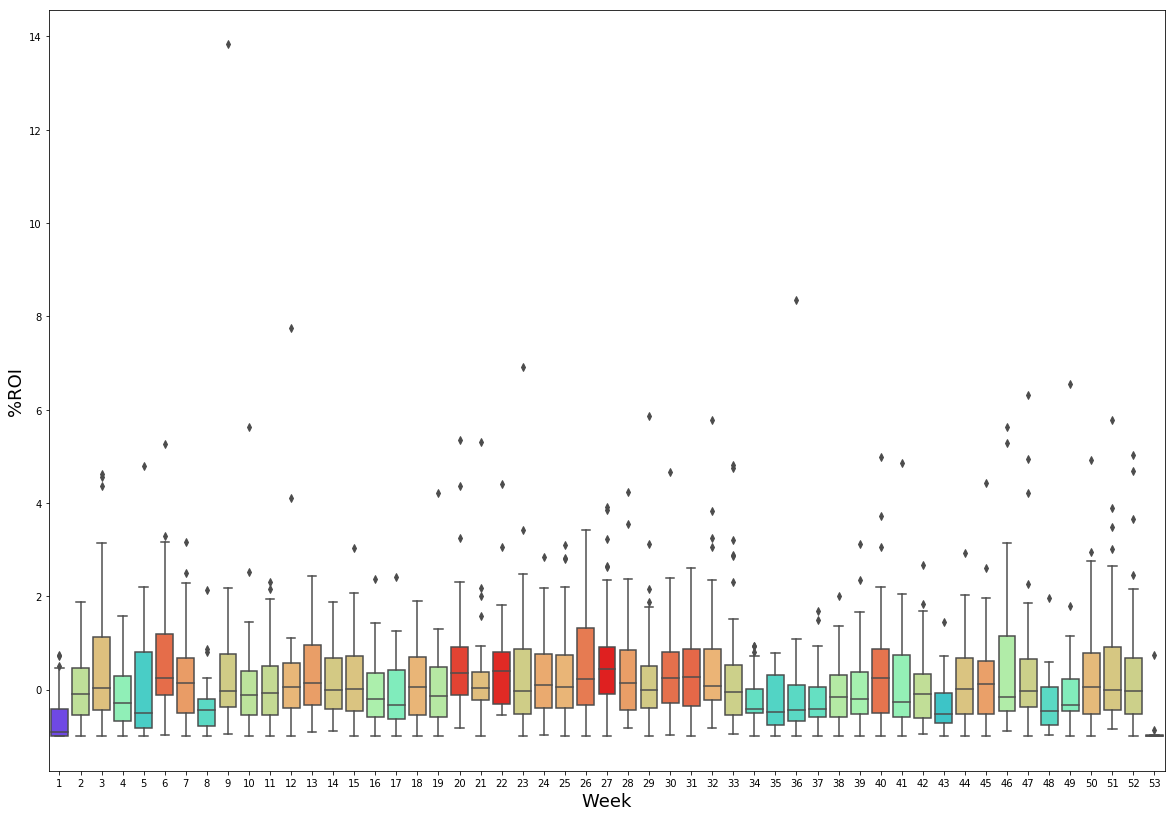

In [15]:
median_vals = MovieNums.groupby('Week')['%ROI'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.rainbow(norm(median_vals))
plt.axhline(y=0, color = "black", label = "Break Even Point");
plt.figure(figsize=(20,14))
ax = sns.boxplot(x="Week", y="%ROI", data=MovieNums, palette=colors)
plt.show()

In [16]:
MovieNums.groupby('Week')['%ROI'].median()

Week
1    -0.913004
2    -0.102000
3     0.025773
4    -0.278102
5    -0.496067
6     0.254770
7     0.136961
8    -0.448717
9    -0.021640
10   -0.120316
11   -0.080141
12    0.061422
13    0.133749
14   -0.010876
15    0.011834
16   -0.192132
17   -0.328635
18    0.064942
19   -0.146769
20    0.350558
21    0.031581
22    0.407090
23   -0.027132
24    0.102315
25    0.065051
26    0.222995
27    0.433786
28    0.135942
29   -0.017853
30    0.254139
31    0.269916
32    0.072952
33   -0.042116
34   -0.420702
35   -0.471446
36   -0.446434
37   -0.413420
38   -0.153121
39   -0.210501
40    0.242362
41   -0.269708
42   -0.097191
43   -0.534058
44    0.013645
45    0.126445
46   -0.169439
47   -0.038364
48   -0.449204
49   -0.325112
50    0.052136
51    0.001033
52   -0.040642
53   -1.000000
Name: %ROI, dtype: float64

In [17]:
df = sns.load_dataset("tips")

median_vals = df.groupby('day')['total_bill'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
colors = plt.cm.coolwarm(norm(median_vals))

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="day", y="total_bill", data=df, palette=colors)
plt.show()

TypeError: float() argument must be a string or a number, not 'SingleBlockManager'

In [ ]:
norm

In [ ]:
median_vals[0]

In [ ]:
norm(median_vals[0])

In [ ]:
df = sns.load_dataset("tips")

median_vals = df.groupby('day')['total_bill'].median()
norm = plt.Normalize(median_vals.min(), median_vals.max())
median_vals = median_vals.tolist()
colors = plt.cm.coolwarm(norm(median_vals))

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="day", y="total_bill", data=df, palette=colors)
plt.show()
